### **Simple Neural Network in Python using TensorFlow**



In [26]:
#import important libraries
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [27]:
#remove warning
import warnings
warnings.filterwarnings('ignore')

In [28]:
#load titanic datset
df= sns.load_dataset('titanic')

In [29]:
#print the first 5 rows of the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
#check the shape of data
df.shape

(891, 15)

In [31]:
#check the null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
#emove the rows which have null values
df.dropna(subset=['age','deck','embark_town','embarked'],inplace=True)

In [33]:
#check the missing values again
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

- we have no null values now!

In [34]:
#check the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [35]:
#print the column name
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [36]:
# One-hot encode categorical features in the DataFrame 'df'
df = pd.get_dummies(df, columns=['sex', 'class', 'who', 'embarked', 'deck'], drop_first=True)

# Select features and target after one-hot encoding
x = df.drop(['survived', 'alive', 'adult_male', 'alone', 'embark_town'], axis=1)
y = df['survived']

# Split the datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
#check the shape of x_train
x_train.shape[1]

18

In [38]:
#check the shape of  y_train
y_train.shape

(145,)

In [39]:
#check the shape of x_test and y_test
x_test.shape, y_test.shape

((37, 18), (37,))

In [40]:
#build the model
input_layer= tf.keras.layers.Dense(10, activation='relu',input_shape=(x_train.shape[1],))
output_layer= tf.keras.layers.Dense(1, activation='sigmoid')

#combine the layers into a model
model= tf.keras.Sequential([input_layer, output_layer])

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
#train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
5/5 [==============================] - 1s 44ms/step - loss: 0.6674 - accuracy: 0.6483 - val_loss: 0.6229 - val_accuracy: 0.7297
Epoch 2/5
5/5 [==============================] - 0s 11ms/step - loss: 0.6541 - accuracy: 0.6483 - val_loss: 0.6162 - val_accuracy: 0.7297
Epoch 3/5
5/5 [==============================] - 0s 9ms/step - loss: 0.6436 - accuracy: 0.6690 - val_loss: 0.6095 - val_accuracy: 0.7297
Epoch 4/5
5/5 [==============================] - 0s 11ms/step - loss: 0.6310 - accuracy: 0.6759 - val_loss: 0.6038 - val_accuracy: 0.7297
Epoch 5/5
5/5 [==============================] - 0s 14ms/step - loss: 0.6213 - accuracy: 0.6897 - val_loss: 0.5974 - val_accuracy: 0.7297


In [42]:
#evalute the model
loss, accuracy= model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

2/2 [==============================] - 0s 6ms/step - loss: 0.5974 - accuracy: 0.7297
Test Loss: 0.5974
Test Accuracy: 72.97%


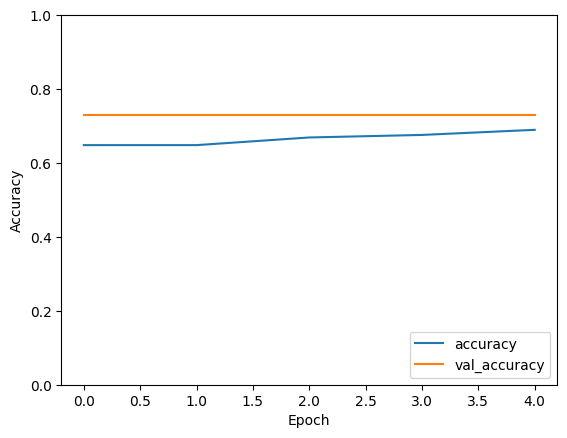

In [43]:
#plot the Training and Validation Accuracy and Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

